<a href="https://colab.research.google.com/github/Frhan21/Praktikum-Labdas-Program/blob/main/Penyelesaian_Modul_M10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# Modul 10 
# Menentukan Viskositas Zat Cair 

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

global t1,r1,t2,r2,slope

def slope(n,t,r):
  a = (n*sum((1/t)*(r**2)) - sum(1/t)*sum(r**2))/(n*sum((1/t)**2) - (sum(1/t))**2 )
  return a

def intercept (n,t,r,a):
  b = (sum(r**2)/n) - a*(sum(1/t)/n)
  return b 
L = 70
rhoB = 2.7
rhoG = 1.76
rhoM = 0.92

# Data Gliserin 
r1 = np.array([.4695,.5725,.63,.77,.91,.9245,.98,1.02])
t1 = np.array([2.44,2.12,2.12,1.94,2.03,2.03,2.00,2.13])

# Data Minyak Goreng 
r2 = np.array([.4695,.5725,.63,.77,.91,.9245,.98,1.02])
t2 = np.array([.75,.72,.66,.53,.46,.66,.54,.63])



----------------------------------------
            1.Data Gliserin
----------------------------------------
     X      Y      X^2       XY     
----------------------------------------
    1/t   r^2  (1/t)^2  r^2*(1/t)
0 0.410 0.220    0.168      0.090
1 0.472 0.328    0.222      0.155
2 0.472 0.397    0.222      0.187
3 0.515 0.593    0.266      0.306
4 0.493 0.828    0.243      0.408
5 0.493 0.855    0.243      0.421
6 0.500 0.960    0.250      0.480
7 0.469 1.040    0.220      0.488
  3.823  5.222    1.834    2.535 == Jumlah
----------------------------------------
Gradien  = 5.605
Intersep = -2.026
Persamaan garis kita menjadi Y = 5.605X + -2.026
Xrata = 0.478
Yrata = 0.653
(Xmax,Ymax) = (0.515,0.863)
(Xmin,Ymin) = (0.410,0.271)
Viskositas       = 16.408 gr/cm.s
Viskositas Teori = 1.5 gr/cm.s
% Kesalahan      = 993.869 %


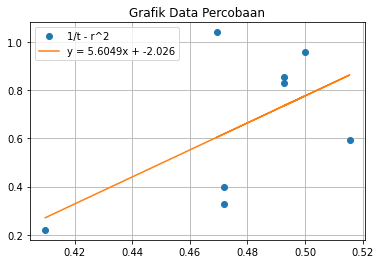

In [5]:
global t1 
pd.set_option('display.float_format', lambda x: '%.3f' % x)
print('-'*40)
print(f'            1.Data Gliserin')
print('-'*40)

data = {
    '1/t':(1/t1),
    'r^2':r1**2,
    '(1/t)^2':(1/t1)**2,
    'r^2*(1/t)':(r1**2)*(1/t1)
}
n = len(t1)
index=[]
for i in range (1,n+1):
  index.append(i)
df = pd.DataFrame(data)
print(f'     {"X":7s}{"Y":7s}{"X^2":10s}{"XY":7s}\n{"-"*40}')
print(df)

print(f'''{'='*40}
{sum(1/t1):7.3f}{sum(r1**2):7.3f}{sum((1/t1)**2):9.3f}{sum((r1**2)*(1/t1)):9.3f} == Jumlah''')
print('-'*40)


n = len(t1)
a = slope(n,t1,r1)
b = intercept(n,t1,r1,a) 
ymax = a*max((1/t1)) + b
ymin = a*min((1/t1)) + b
Visko_prk = (2*a*(rhoB-rhoG)*981)/(9*L)
Visko_teori = 1.5
relatif = (abs(Visko_prk - Visko_teori)/Visko_teori)*100 

print(f'''Gradien  = {a:.3f}
Intersep = {b:.3f}
Persamaan garis kita menjadi Y = {a:.3f}X + {b:.3f}
Xrata = {sum(1/t1)/n:.3f}
Yrata = {sum(r1**2)/n:.3f}
(Xmax,Ymax) = ({max(1/t1):.3f},{ymax:.3f})
(Xmin,Ymin) = ({min(1/t1):.3f},{ymin:.3f})
Viskositas       = {Visko_prk:.3f} gr/cm.s
Viskositas Teori = {Visko_teori} gr/cm.s
% Kesalahan      = {relatif:.3f} %
{'='*40}''')


plt.plot((1/t1),(r1**2),'o')
plt.grid()
plt.title('Grafik Data Percobaan',)
y = a*(1/t1) + b
plt.plot(1/t1,y)
plt.legend(['1/t - r^2',f'y = {a:.4f}x + {b:.3f}'])

plt.show()

----------------------------------------
         2.Data Minyak Goreng
----------------------------------------
     X      Y      X^2       XY     
----------------------------------------
     1/t    r^2  (1/t)^2  r^2*(1/t)
1 1.3333 0.2204   1.7778     0.2939
2 1.3889 0.3278   1.9290     0.4552
3 1.5152 0.3969   2.2957     0.6014
4 1.8868 0.5929   3.5600     1.1187
5 2.1739 0.8281   4.7259     1.8002
6 1.5152 0.8547   2.2957     1.2950
7 1.8519 0.9604   3.4294     1.7785
8 1.5873 1.0404   2.5195     1.6514
 13.252  5.222   22.533    8.994 == Jumlah
----------------------------------------
Gradien  = 0.594
Intersep = -0.332
Persamaan garis kita menjadi Y = 0.594X + -0.332
Xrata = 1.657
Yrata = 0.653
(Xmax,Ymax) = (2.174,0.960)
(Xmin,Ymin) = (1.333,0.461)

Viskositas       = 3.294 gr/cm.s
Viskositas Teori = 0.694 gr/cm.s
% Kesalahan      = 374.705 %


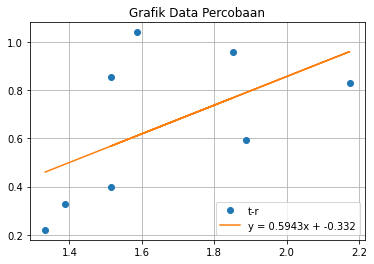

In [6]:
pd.set_option('display.float_format', lambda x: '%.4f' % x)
print('-'*40)
print(f'         2.Data Minyak Goreng')
print('-'*40)
# Plot Ke tabel 
data = {
    '1/t':(1/t2),
    'r^2':r2**2,
    '(1/t)^2':(1/t2)**2,
    'r^2*(1/t)':(r2**2)*(1/t2)
}

n = len(t2)
index=[]
for i in range (1,n+1):
  index.append(i)
df = pd.DataFrame(data,index)
print(f'     {"X":7s}{"Y":7s}{"X^2":10s}{"XY":7s}\n{"-"*40}')
print(df)

print(f'''{'='*40}
{sum(1/t2):7.3f}{sum(r2**2):7.3f}{sum((1/t2)**2):9.3f}{sum((r2**2)*(1/t2)):9.3f} == Jumlah''')
print('-'*40)



a = slope(n,t2,r2)
b = intercept(n,t2,r2,a) 
ymax = a*max((1/t2)) + b
ymin = a*min((1/t2)) + b
Visko_prk = (2*a*(rhoB-rhoM)*981)/(9*L)
Visko_teori = 0.694
relatif = (abs(Visko_prk - Visko_teori)/Visko_teori)*100 

print(f'''Gradien  = {a:.3f}
Intersep = {b:.3f}
Persamaan garis kita menjadi Y = {a:.3f}X + {b:.3f}
Xrata = {sum(1/t2)/n:.3f}
Yrata = {sum(r2**2)/n:.3f}
(Xmax,Ymax) = ({max(1/t2):.3f},{ymax:.3f})
(Xmin,Ymin) = ({min(1/t2):.3f},{ymin:.3f})

Viskositas       = {Visko_prk:.3f} gr/cm.s
Viskositas Teori = {Visko_teori} gr/cm.s
% Kesalahan      = {relatif:.3f} %
{'='*40}''')

# Plot Grafik Data
plt.plot((1/t2),(r2**2),'o')
plt.grid()
plt.title('Grafik Data Percobaan',)
y = a*(1/t2) + b
plt.plot(1/t2,y,'-')
plt.legend(['t-r',f'y = {a:.4f}x + {b:.3f}'])
plt.show()